# **Analysing Employment Outcome Data**


---

## 1. **Project Overview**

## 1.1) **Introduction**

Employability refers to the degree to which individuals possess the necessary skills, knowledge, and abilities to secure and maintain employment that aligns with their education, training, and experience.

## 1.2) **Problem Statement**

 In India, employability has been a significant concern in recent years, with many graduates struggling to find jobs that match their qualifications.

## 1.2) **Objectives**

a) **Main Objective**

Investigate the employability outcomes in India and identify the key factors that contribute to the employability gap.

b) **Specific Objectives**

1. To establish where there is a relationship between job title and salary.

2. To investigate whether there is a relaship between (i) gender and salary and (ii) gender and specialization

## 1.3) **Success metrics**

a) Data Preprocessing


*   Understanding the data
*   Cleaning data
*   Feature Engineering

b) Defining the hypotheses

c) Identify test statistic

d) Analyse evidence against the Null hypothesis

e) Communicate findings


## 1.4) **Understanding the task**

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature.


**Below are the various variables in our dataset;**

1. **ID** : A unique ID to identify a candidate
2. **Salary** : Annual CTC oﬀered to the candidate (in INR)
3. **DOJ** : Date of joining the company
4. **DOL** : Date of leaving the company
5. **Designation** : Designation oﬀered in the job
6. **JobCity** : Location of the job (city)
7. **Gender** : Candidate’s gender
8. **DOB** : Date of birth of candidate
9. **10percentage** :  Overall marks obtained in grade 10 examinations
10. **10board** : The school board whose curriculum the candidate followed in grade 10
11. **12graduation** : Year of graduation - senior year high school
12. **12percentage** : Overall marks obtained in grade 12 examinations
13. **12board** : The school board whose curriculum the candidate followed in grade 12
14. **CollegeID** : Unique ID identifying the college which the candidate attended
15. **CollegeTier** : Tier of college
16. **Degree** : Degree obtained/pursued by the candidate
17. **Specialization** : Specialization pursued by the candidate
18. **CollegeGPA** : Aggregate GPA at graduation
19. **CollegeCityID** : A unique ID to identify the city in which the college is located in
20. **CollegeCityTier** : The tier of the city in which the college is located
21. **CollegeState** : Name of States
22. **GraduationYear** : Year of graduation (Bachelor’s degree)
23. **English** : Scores in AMCAT English section
24. **Logical** : Scores in AMCAT Logical section
25. **Quant** : Scores in AMCAT Quantitative section
26. **Domain** : Scores in AMCAT’s domain module
27. **ComputerProgramming** : Score in AMCAT’s Computer programming section
28. **ElectronicsAndSemicon** :Score in AMCAT’s Electronics & Semiconductor Engineering section
29. **ComputerScience** : Score in AMCAT’s Computer Science section
30. **MechanicalEngg** : Score in AMCAT’s Mechanical Engineering section
31. **ElectricalEngg** : Score in AMCAT’s Electrical Engineering section
32. **TelecomEngg** : Score in AMCAT’s Telecommunication Engineering section
33. **CivilEngg** : Score in AMCAT’s Civil Engineering section
34. **conscientiousness** : Scores in one of the sections of AMCAT’s personality test
35. **agreeableness** : Scores in one of the sections of AMCAT’s personality test
36. **extraversion** : Scores in one of the sections of AMCAT’s personality test
37. **neuroticism** : Scores in one of the sections of AMCAT’s personality test
38. **openess_to_experience** : Scores in one of the sections of AMCAT’s personality test

 




In [ ]:
# Import Libraries

import numpy as np
import pandas as pd

import scipy.stats as stats
from scipy.stats import t

import datetime
from dateutil.relativedelta import relativedelta

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('dark')

import warnings
warnings.filterwarnings('ignore')

## **Read the Data**

In [ ]:
# Load data 

df = pd.read_excel('/content/drive/MyDrive/aspiring_minds_employability_outcomes_2015.xlsx')

df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


## **Understanding the Data**

In [ ]:
df.shape

(3998, 39)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [ ]:
# Check for null values

null = []
for i in df:
    value = df[i].isin([-1, 'NaN' , 0]).sum()
    null.append([f'{i} : {value}'])
print(*null, sep = "\n")

['Unnamed: 0 : 0']
['ID : 0']
['Salary : 0']
['DOJ : 0']
['DOL : 0']
['Designation : 0']
['JobCity : 461']
['Gender : 0']
['DOB : 0']
['10percentage : 0']
['10board : 350']
['12graduation : 0']
['12percentage : 0']
['12board : 359']
['CollegeID : 0']
['CollegeTier : 0']
['Degree : 0']
['Specialization : 0']
['collegeGPA : 0']
['CollegeCityID : 0']
['CollegeCityTier : 2797']
['CollegeState : 0']
['GraduationYear : 1']
['English : 0']
['Logical : 0']
['Quant : 0']
['Domain : 246']
['ComputerProgramming : 868']
['ElectronicsAndSemicon : 2854']
['ComputerScience : 3096']
['MechanicalEngg : 3763']
['ElectricalEngg : 3837']
['TelecomEngg : 3624']
['CivilEngg : 3956']
['conscientiousness : 0']
['agreeableness : 0']
['extraversion : 0']
['nueroticism : 0']
['openess_to_experience : 0']


In [ ]:
# Check duplicate values
 
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3998.0,663794.540520,363218.245829,11244.0000,334284.250000,639600.000000,990480.000000,1.298275e+06
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
CollegeID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeTier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
CollegeCityID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeCityTier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00


In [ ]:
df.describe(include='object')

,Unnamed: 0,DOL,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
count,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998
unique,1,67,419,339,2,275,340,4,46,26
top,train,present,software engineer,Bangalore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
freq,3998,1875,539,627,3041,1395,1400,3700,880,915


**Observations:**

1. There are outliers in the numerical variables.
2. The scores in AMCAT sections have -1 values. Those will be excluded in visualizations.


In [ ]:
# Drop unnecessary columns

df = df.drop(columns=['Unnamed: 0', 'ID','CollegeID', 'CollegeCityID'], axis=1)

In [ ]:
# Empty lists to store categorical and numerical column names

cat_cols = []
num_cols = []

for col in df.columns:
    if df[col].dtype == 'object' and col != 'DOL':
        cat_cols.append(col)
    elif df[col].dtype in ['float64', 'int64']:
        num_cols.append(col)

# Print the categorical and numerical column names
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: ['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']
Numerical columns: ['Salary', '10percentage', '12graduation', '12percentage', 'CollegeTier', 'collegeGPA', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


## **Numerical Variables**

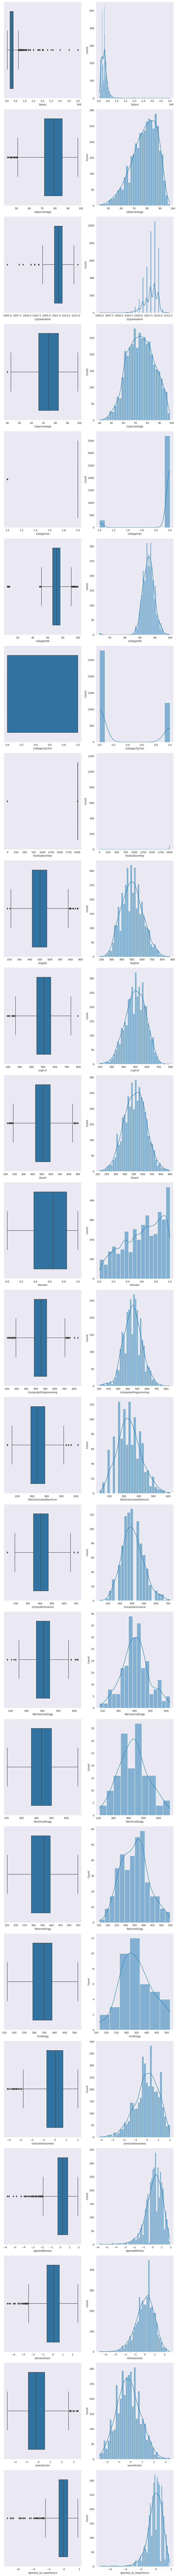

In [ ]:
fig, axs = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(10, 6*len(num_cols)))

# Loop through each numerical column and plot a boxplot and displot with KDE
for i, col in enumerate(num_cols):
    if col not in ['Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']:
        sns.boxplot(x=df[df[col]!=-1][col], ax=axs[i][0])  # Exclude -1 values from specified columns
        sns.histplot(data=df[df[col]!=-1], x=col, kde=True, ax=axs[i][1])
    else:
        sns.boxplot(x=df[col][df[col]!=-1], ax=axs[i][0])
        sns.histplot(data=df[df[col]!=-1], x=col, kde=True, ax=axs[i][1])
        
# Adjust the plot layout
plt.tight_layout()


**Cleaning**



In [ ]:
pd.options.display.float_format = '{:.2f}'.format

Salary

In [ ]:
df['Salary'].describe()

count      3998.00
mean     307699.85
std      212737.50
min       35000.00
25%      180000.00
50%      300000.00
75%      370000.00
max     4000000.00
Name: Salary, dtype: float64

In [ ]:
(df['Salary'] <= 1000000).value_counts()

True     3962
False      36
Name: Salary, dtype: int64

In [ ]:
median_salary = df['Salary'].median()
df.loc[df['Salary'] > 1000000, 'Salary'] = median_salary

df['Salary'].describe()

count      3998.00
mean     294363.18
std      140911.87
min       35000.00
25%      180000.00
50%      300000.00
75%      360000.00
max     1000000.00
Name: Salary, dtype: float64

CollageTier & CollageCityTier

In [ ]:
# Convert the 'CollegeTier' and 'CollegeCityTier' columns to categorical

df['CollegeTier'] = df['CollegeTier'].astype('category')
df['CollegeCityTier'] = df['CollegeCityTier'].astype('category')

CollageGPA

In [ ]:
# CollegeGPA

(df['collegeGPA'] < 40).sum()

12

In [ ]:
df.loc[df['collegeGPA'] < 40, 'collegeGPA'] = 40

In [ ]:
df['collegeGPA'].describe()

count   3998.00
mean      71.58
std        7.58
min       40.00
25%       66.41
50%       71.72
75%       76.33
max       99.93
Name: collegeGPA, dtype: float64

Graduation Year

In [ ]:
df['GraduationYear'].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

In [ ]:
median_gradyr = df['GraduationYear'].median()
df.loc[df['GraduationYear'] <= 2007, 'GraduationYear'] = median_gradyr

## **Categorical Variables**

In [ ]:
for column in cat_cols:
    print(f'{column} Unique Values\n')
    print(df[column].unique().tolist())
    print(df[column].nunique())
    print('\n')
    print('-'*100)
    print('\n')

Designation Unique Values

['senior quality engineer', 'assistant manager', 'systems engineer', 'senior software engineer', 'get', 'system engineer', 'java software engineer', 'mechanical engineer', 'electrical engineer', 'project engineer', 'senior php developer', 'senior systems engineer', 'quality assurance engineer', 'qa analyst', 'network engineer', 'product development engineer', 'associate software developer', 'data entry operator', 'software engineer', 'developer', 'electrical project engineer', 'programmer analyst', 'systems analyst', 'ase', 'telecommunication engineer', 'application developer', 'ios developer', 'executive assistant', 'online marketing manager', 'documentation specialist', 'associate software engineer', 'management trainee', 'site manager', 'software developer', '.net developer', 'production engineer', 'jr. software engineer', 'trainee software developer', 'ui developer', 'assistant system engineer', 'android developer', 'customer service', 'test engineer', 'j

Some columns have too many categories that need cleaning

**Cleaning**

In [ ]:
df['Gender'].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

The Gender column is unbalanced and the hypothesis will be biased towards men.

In [ ]:
top_10_categories = df['Designation'].value_counts().head(10)
print(top_10_categories)

software engineer             539
software developer            265
system engineer               205
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
Name: Designation, dtype: int64


In [ ]:
# Create job groups 

software_dev = ['senior software engineer', 'software developer','java developer','trainee software engineer','web designer','software architect', 'software eng','programmer analyst trainee','senior developer','.net web developer','senior java developer','application engineer','software engineering associate','junior software engineer', 'software development engineer', 'assistant programmer', 'android developer','programmer', 'sql developer', 'ase','application developer','ui developer', 'web developer','jr. software developer', 'java software engineer','product development engineer','senior php developer', 'associate software engineer', 'associate software developer', 'software engineer','ios developer', 'developer', 'jr. software engineer', 'trainee software developer', 'assistant software engineer', 'senior software developer', 'software test engineer', 'php developer', 'asp.net developer', '.net developer', 'mobile application developer', 'embedded software engineer', 'web application developer', 'python developer', 'salesforce developer', 'sharepoint developer', 'etl developer', 'principal software engineer', 'software devloper', 'software engineer analyst', 'software engineer trainee', 'game developer']
engineering = ['senior quality engineer','systems engineer','qa analyst','senior engineer', 'project engineer', 'manufacturing engineer','rf engineer','service engineer', 'operations engineer','operation engineer','electrical engineer','electrical designer','field service engineer', 'quality assurance', 'maintenance engineer', 'electronic field service engineer','quality assurance automation engineer','automation engineer', 'junior engineer', 'associate engineer', 'design engineer', 'field engineer', 'engineer trainee','quality analyst', 'quality engineer', 'qa engineer', 'quality assurance engineer','engineer','software quality assurance tester','trainee engineer', 'test engineer', 'assistant system engineer', 'production engineer', 'planning engineer' , 'network administrator', 'senior systems engineer','systems engineer', 'technical engineer', 'mechanical engineer','system engineer', 'get', 'graduate engineer trainee', 'quality assuarance engineer', 'electrical engineer', 'project engineer','test technician','testing engineer', 'electrical project engineer','network engineer', 'quality engineer', 'firmware engineer', 'telecom engineer', 'hardware engineer', 'embedded engineer','associate test engineer', 'electrical design engineer', 'continuous improvement engineer','mechanical design engineer', 'quality control engineer', 'product engineer', 'senior design engineer', 'senior mechanical engineer','testing engineer', 'dcs engineer']
management = ['assistant manager', 'manager','executive assistant' ,'admin assistant','operations manager','asst. manager','operation executive','management trainee','logistics executive','senior sales executive', 'operations executive', 'service manager','business development executive','entry level management trainee', 'business development managerde','site manager', 'business development manager', 'sales associate', 'sales executive', 'account executive', 'mis executive' 'operations executive', 'operations assistant', 'associate manager', 'branch manager', 'senior project engineer', 'general manager', 'engineering manager', 'field based employee relations manager', 'sales account manager']
it_support = ['systems analyst', 'technical support engineer', 'it support specialist','associate technical operations', 'it operations associate','technical assistant','system administrator', 'engineering technician','business technology analyst', 'systems administrator','technical support executive', 'technical operations analyst', 'technical support specialist','telecom support engineer', 'telecommunication engineer', 'it analyst', 'windows systems administrator', 'linux systems administrator', 'desktop support technician', 'help desk analyst', 'support engineer', 'network support engineer']
data_analytics = ['data analyst', 'research associate', 'research analyst','oracle dba','programmer analyst','research scientist','database administrator','db2 dba', 'research engineer', 'business analyst','field business development associate', 'business intelligence analyst', 'business analyst consultant','sap consultant', 'business process analyst', 'business systems consultant', 'technology analyst', 'data scientist','data entry operator']
marketing_sales = ['online marketing manager', 'marketing coordinator', 'marketing assistant', 'assistant', 'sales engineer', 'service and sales engineer', 'sales management trainee', 'marketing executive', 'sales and service engineer', 'digital marketing specialist', 'sales account manager','service and sales engineer']
teaching_education = ['faculty', 'assistant professor', 'lecturer', 'junior research fellow', 'computer faculty']
hr_recruitment = ['recruitment coordinator', 'hr recruiter', 'human resources associate','recruiter','recruitment associate','executive recruiter','technical recruiter', 'talent acquisition specialist', 'staffing recruiter', 'executive hr']
project_management = ['project coordinator', 'project assistant','project analyst']
customer_service = ['customer service', 'customer service representative', 'customer service manager','engineer- customer support', 'service coordinator','client services associate']
other = ['documentation specialist', 'performance engineer', 'technical writer', 'ux designer',  'phone banking officer', 'cloud engineer', 'seo trainee', 'sap abap consultant', 'seo engineer',  'process advisor']


In [ ]:
# create a dictionary to store the job titles in their respective groups
groups = {
    'Software Development': software_dev,
    'Engineering': engineering,
    'Management': management,
    'IT Support': it_support,
    'Data and Analytics': data_analytics,
    'Marketing and Sales': marketing_sales,
    'Teaching and Education': teaching_education,
    'HR and Recruitment': hr_recruitment,
    'Project Management' : project_management,
    'Customer Service': customer_service,
    'Other': other
}

# Create an empty list to store the group labels for each job title
group_labels = []

# Loop through each job title in the dataframe
for job_title in df['Designation']:
    # Loop through each group in the groups dictionary
    for group_name, group_list in groups.items():
        if job_title in group_list:
            group_labels.append(group_name)
            break
    # If the job title is not in any group, add it to the 'Other' group
    else:
        group_labels.append('Other')

# Add the group column to the dataframe
df['Job_group'] = group_labels

# Create a list of 'Other' with the same length as the number of rows in the dataframe
other_list = ['Other'] * len(df)

# Replace the values in the 'group' column where there is no group match with 'Other'
df['Job_group'] = np.where(df['Job_group']=='Other', other_list, df['Job_group'])

df['Job_group'].value_counts()

Software Development      1691
Engineering               1044
Other                      424
Data and Analytics         327
Management                 183
IT Support                 171
Customer Service            56
Teaching and Education      39
Marketing and Sales         28
HR and Recruitment          23
Project Management          12
Name: Job_group, dtype: int64

In [ ]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [ ]:
top_Specializations = df['Specialization'].value_counts().head(10)
print(top_Specializations)

electronics and communication engineering    880
computer science & engineering               744
information technology                       660
computer engineering                         600
computer application                         244
mechanical engineering                       201
electronics and electrical engineering       196
electronics & telecommunications             121
electrical engineering                        82
electronics & instrumentation eng             32
Name: Specialization, dtype: int64


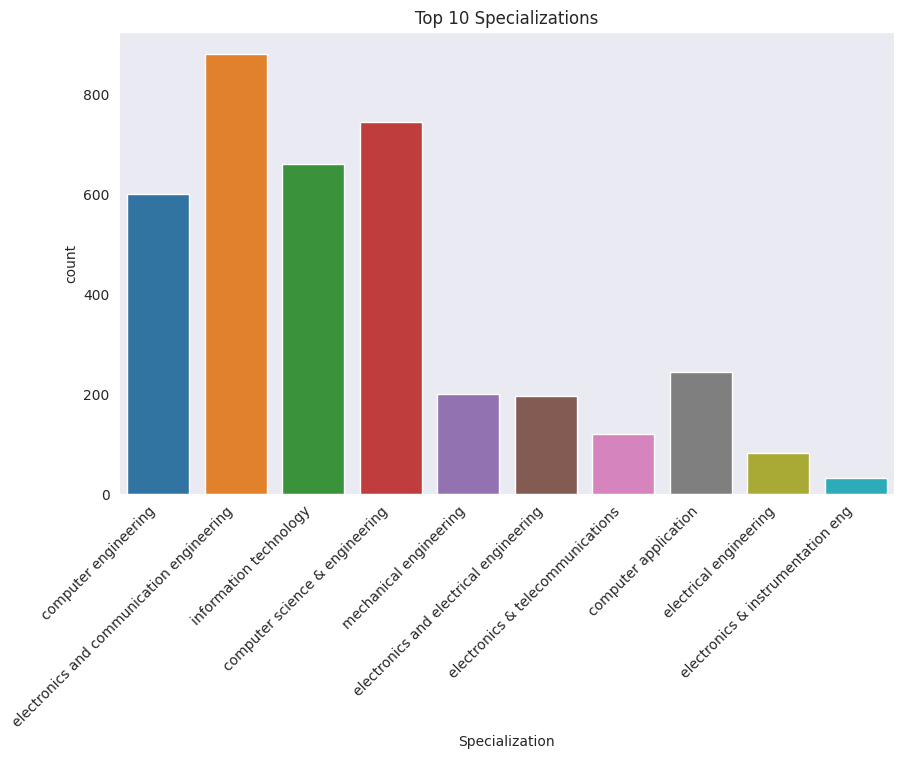

In [ ]:
# Plot the countplot for top 10 specializations

plt.figure(figsize=(10,6))
sns.countplot(x='Specialization', data=df[df['Specialization'].isin(top_Specializations.index)])
plt.title('Top 10 Specializations')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
cat_cols1 = ['Gender', 'Degree', 'Job_group']

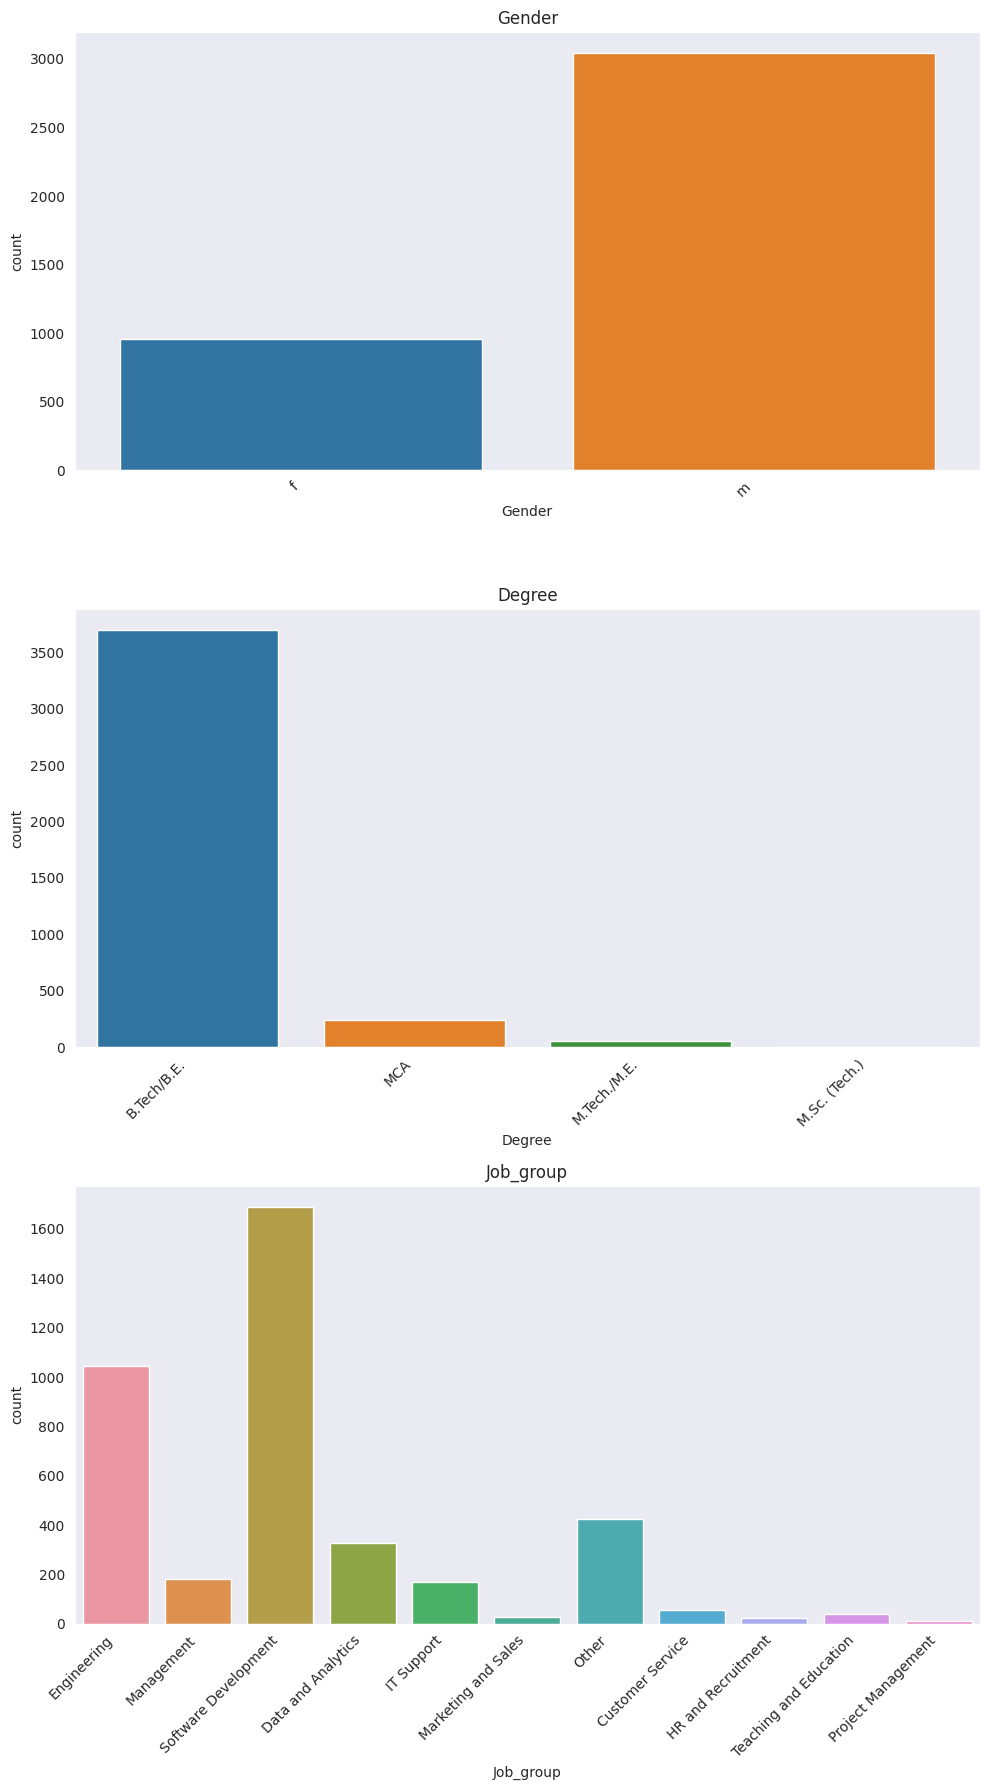

In [ ]:
# Create subplots with two columns for the categorical columns
fig, axs = plt.subplots(nrows=len(cat_cols1), ncols=1, figsize=(10, 6*len(cat_cols1)))

# Loop through each categorical column and plot a countplot
for i, col in enumerate(cat_cols1):
    # Countplot
    sns.countplot(x=df[col], ax=axs[i])
    axs[i].set_title(f'{col}')
    plt.setp(axs[i].get_xticklabels(), rotation=45, ha='right') # rotate the x-axis labels

# Convert axs to a list of axes objects
axs = axs.tolist()

plt.tight_layout()
plt.show()

## **Feature Engineering**

Age

In [ ]:
# Generate the Age variable from DOB

df['DOB'] = pd.to_datetime(df['DOB'])

now = datetime.datetime.now()

# Calculate age in years
df['Age'] = ((now - df['DOB']) / 365.25).dt.days
df['Age'] = df['Age'].astype(int)

df['Age'].head(3)

0    33
1    33
2    30
Name: Age, dtype: int64

In [ ]:
df['Age'].describe()

count   3998.00
mean      31.86
std        1.78
min       25.00
25%       31.00
50%       32.00
75%       33.00
max       45.00
Name: Age, dtype: float64

Duration between the Graduation Year and DOJ the company

In [ ]:
# Convert DOJ and GraduationYear columns to datetime format
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['GraduationYear'] = pd.to_datetime(df['GraduationYear'], format='%Y')

# Swap DOJ and GraduationYear where DOJ < GraduationYear
mask = df['DOJ'] < df['GraduationYear']
df.loc[mask, ['DOJ', 'GraduationYear']] = df.loc[mask, ['GraduationYear', 'DOJ']]

# Calculate duration in years
df['Duration'] = ((df['DOJ'] - df['GraduationYear']) / 365.25).dt.days
df['Duration'] = df['Duration'].astype(int)

df['Duration'].head(3)

0    1
1    1
2    0
Name: Duration, dtype: int64

In [ ]:
df['Duration'].describe()

count   3998.00
mean       0.38
std        0.85
min      -22.00
25%        0.00
50%        0.00
75%        1.00
max        4.00
Name: Duration, dtype: float64

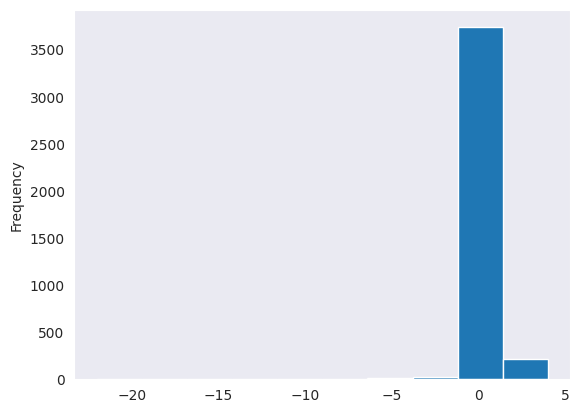

In [ ]:
df['Duration'].plot(kind='hist');

In [ ]:
df['Duration'].value_counts()

 0     2471
 1     1227
 2      179
-1       39
 3       32
-2       13
-3       13
-4        8
 4        8
-6        4
-7        1
-8        1
-22       1
-5        1
Name: Duration, dtype: int64

In [ ]:
median_gradyr = df['Duration'].median()
df.loc[(df['Duration'] < 0) | (df['Duration'] > 3), 'Duration'] = median_gradyr

In [ ]:
df['Duration'].describe()

count   3998.00
mean       0.42
std        0.62
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        3.00
Name: Duration, dtype: float64

In [ ]:
cols = ['Salary', 'collegeGPA', 'Age', 'Duration','Gender', 'Degree', 'Job_group']

## **Multivariate Analysis**

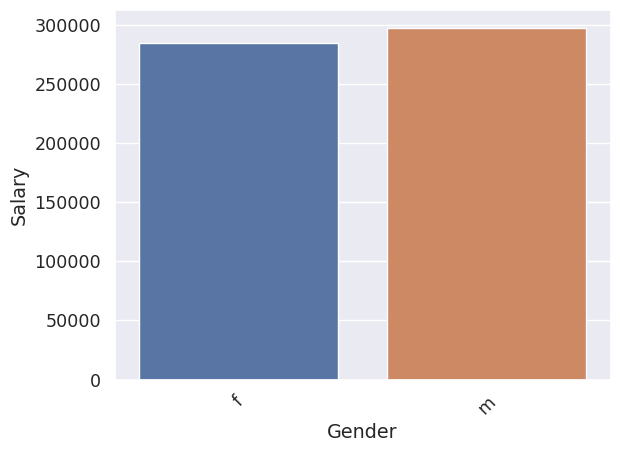

In [ ]:
# Average salary by gender

avg_salary_by_gender = df.groupby("Gender")["Salary"].mean().reset_index()
sns.barplot(x="Gender", y="Salary", data=avg_salary_by_gender)
plt.xticks(rotation=45)
plt.show()

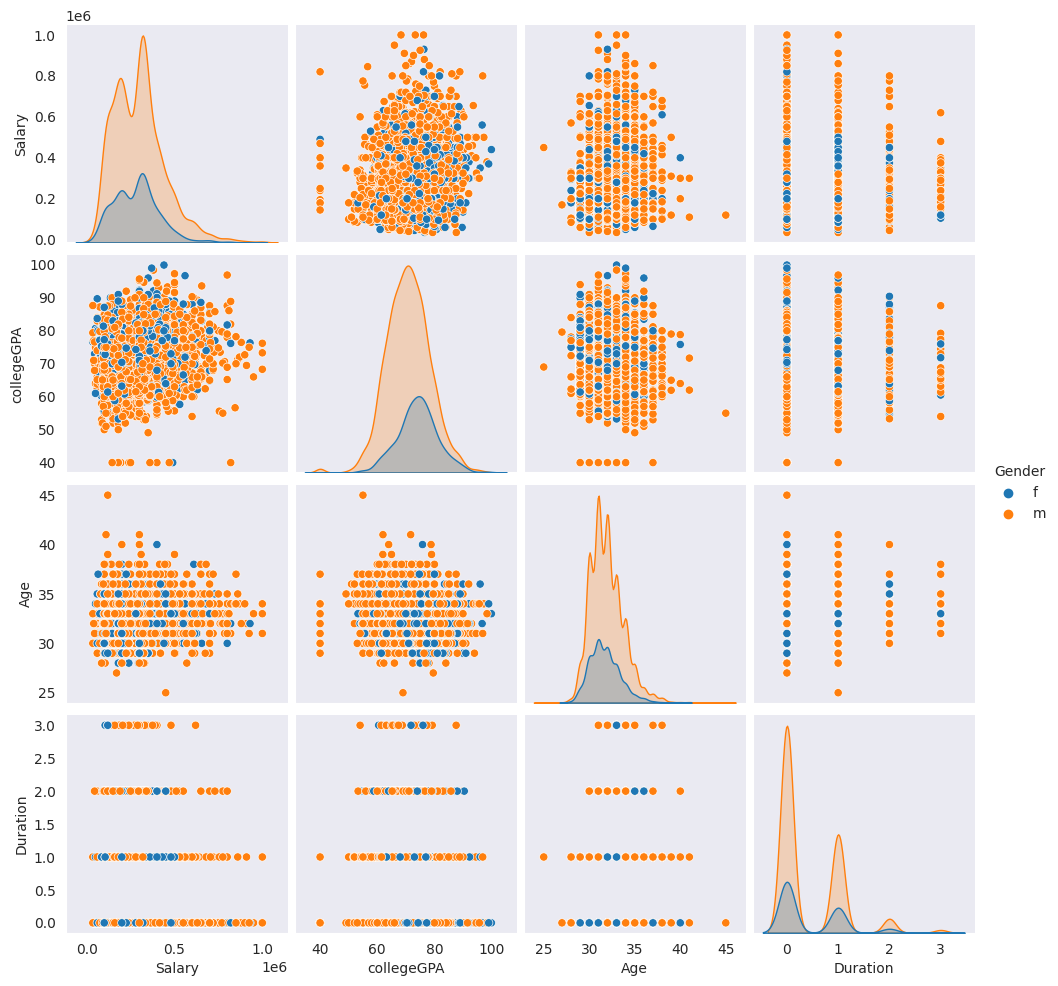

In [ ]:
sns.pairplot(df[cols], hue='Gender');

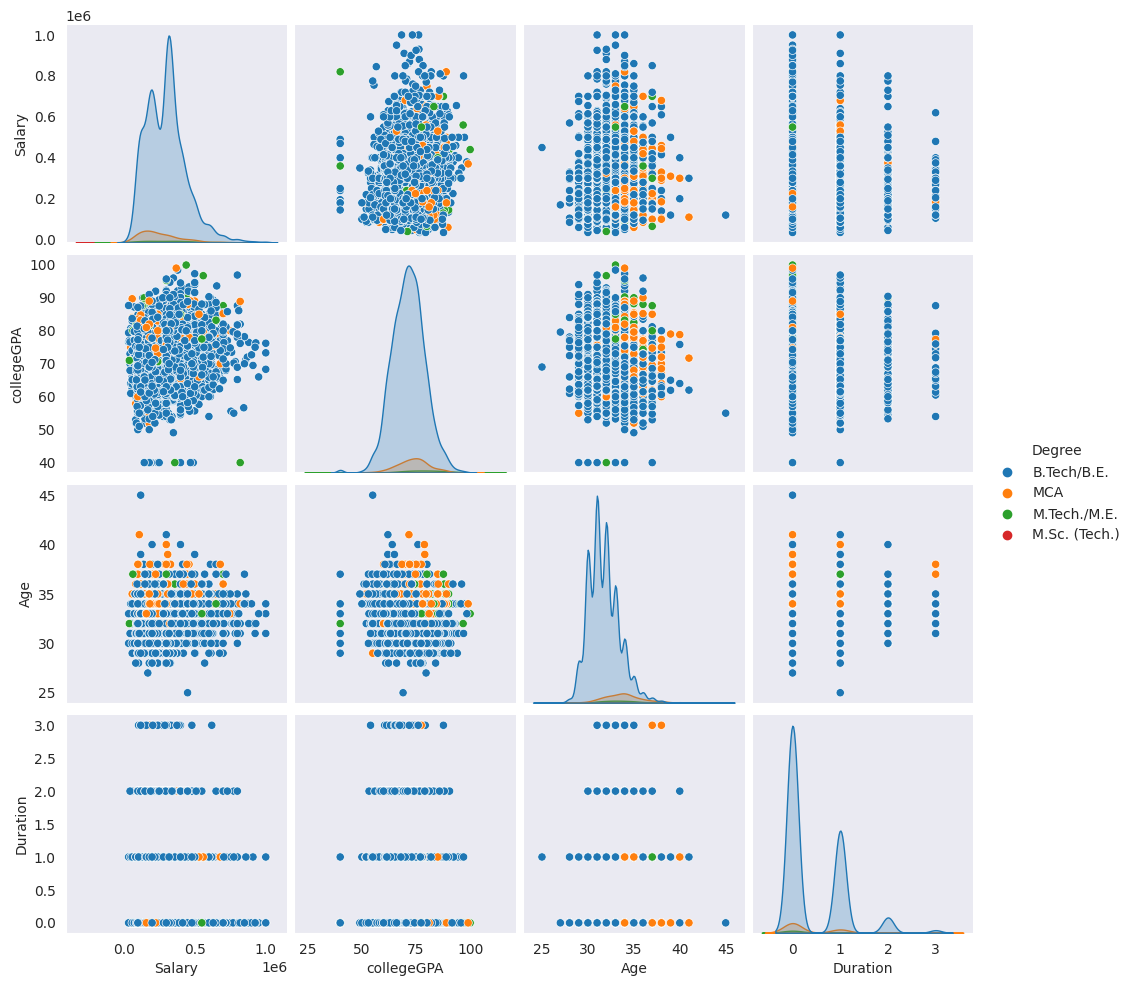

In [ ]:
sns.pairplot(df[cols], hue='Degree');

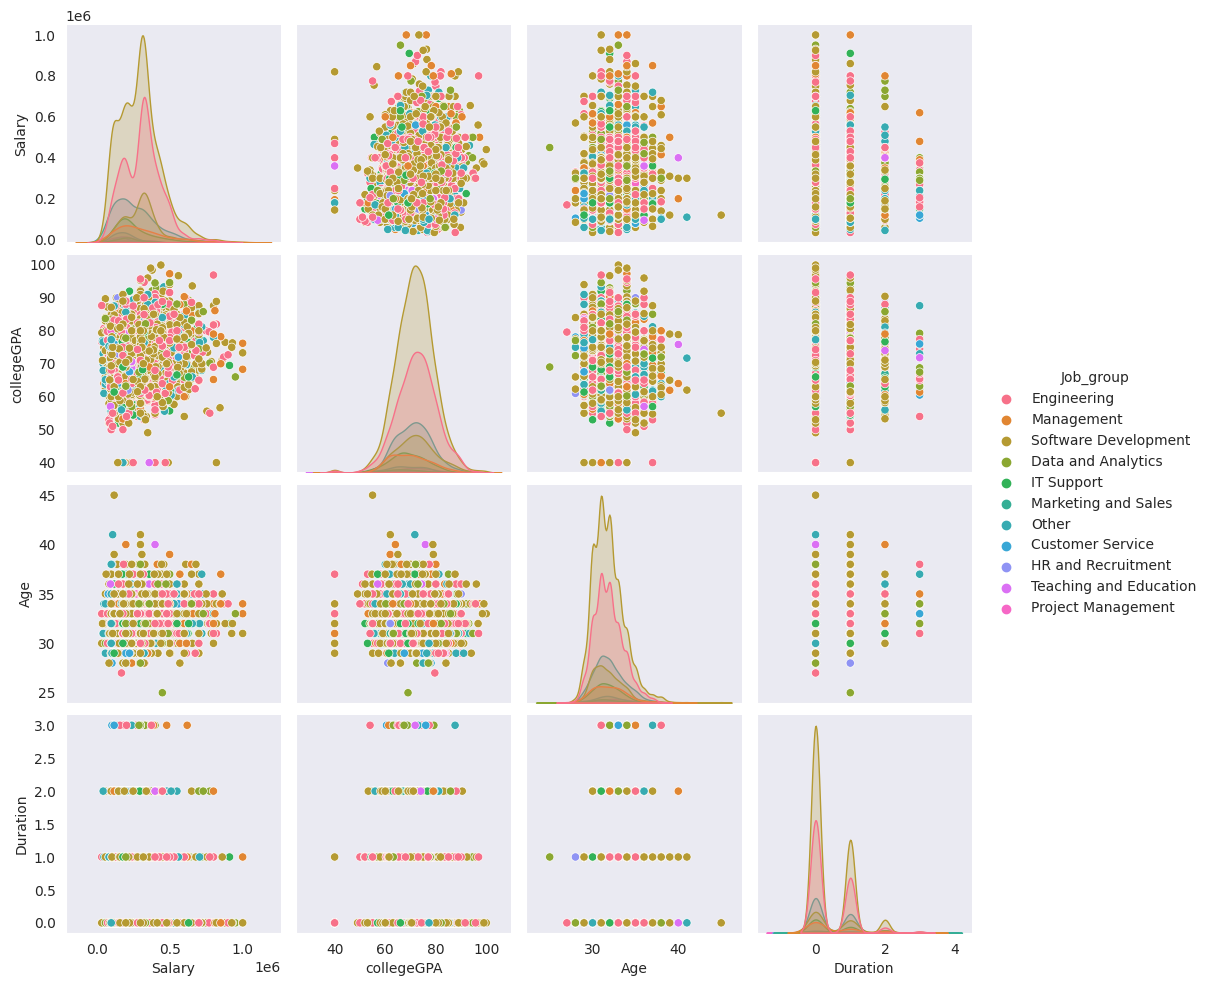

In [ ]:
sns.pairplot(df[cols], hue='Job_group');

**Correlation**

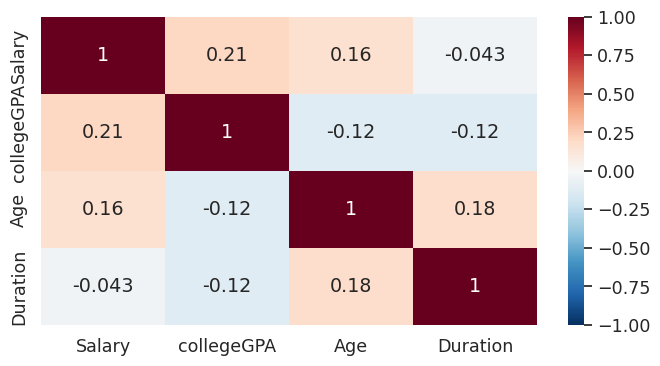

In [ ]:
# Correlation

sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df[cols].corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

## **Hypothesis Testing**

## **Research Questions**

1. Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim.

2. Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

3. What factors (such as degree, specialization, job city, etc.) are most strongly correlated with higher salaries for candidates in this dataset?



## **Hypothesis 1**

**Null Hypothesis (H0)** : The average salary of fresh graduates with a degree in Computer Science Engineering who work as Programming Analysts, Software Engineers, Hardware Engineers, and Associate Engineers is less than or equal to 2.5 lakhs per annum.

**Alternative Hypothesis (Ha)** : The average salary of fresh graduates with a degree in Computer Science Engineering who work as Programming Analysts, Software Engineers, Hardware Engineers, and Associate Engineers is greater than 2.5 lakhs per annum.

In [ ]:
# Extract the salaries of fresh graduates in the relevant fields
relevant_jobs = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
salaries = df[df['Designation'].isin(relevant_jobs)]['Salary'].values

# Sample mean and standard deviation
sample_mean = np.mean(salaries)
sample_std = np.std(salaries, ddof=1)

claimed_value = 250000 # 2.5 lakhs in rupees

alpha = 0.05

# Calculate the t-statistic and p-value
degrees_of_freedom = len(salaries) - 1
t_stat = (sample_mean - claimed_value) / (sample_std / np.sqrt(len(salaries)))
p_value = t.sf(t_stat, degrees_of_freedom)

if p_value < alpha:
    print(f"The p-value ({p_value:.4f}) is less than the significance level ({alpha:.2f}). Reject the null hypothesis.")
else:
    print(f"The p-value ({p_value:.4f}) is greater than the significance level ({alpha:.2f}). Fail to reject the null hypothesis.")

The p-value (nan) is greater than the significance level (0.05). Fail to reject the null hypothesis.
